# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

In [4]:
# page.text

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [5]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [6]:
soup = BeautifulSoup(page.text, 'html')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [7]:
# soup

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [8]:
# print(soup.prettify())

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).


Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [9]:
for link in soup.find_all('a'):
    print(link.get('href'))
#     break

/search
https://offline.nplus1.ru/
https://nplus.pro/
https://nplus1.ru/about
https://nplus1.ru/difficult
https://nplus1.ru/adv
https://nplus1.ru/blog/2022/04/01/samotek
https://nplus1.ru/search?tags=946
https://nplus1.ru/search?tags=869
https://nplus1.ru/search?tags=874
https://nplus1.ru/search?tags=880
https://nplus1.ru/search?tags=768
https://nplus1.ru/search?tags=890
https://nplus1.ru/search?tags=871
https://nplus1.ru/search?tags=876
https://nplus1.ru/search?tags=775
https://nplus1.ru/search?tags=767
https://nplus1.ru/search?tags=771
https://nplus1.ru/search?tags=772
https://nplus1.ru/search?tags=778
https://nplus1.ru/search?tags=917
https://nplus1.ru/search?tags=918
https://nplus1.ru/search?tags=824
https://t.me/nplusone
https://vk.com/nplusone
https://ok.ru/nplus1
https://twitter.com/nplusodin
https://nplus1.ru/about
https://nplus1.ru/difficult
https://nplus1.ru/adv
https://nplus1.ru/blog/2022/04/01/samotek
https://nplus1.ru/search?tags=946
https://nplus1.ru/search?tags=869
https

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [15]:
# urls = []

# for link in soup.find_all('a'):
#     if '/news' in link.get('href'):
#         urls.append('https://nplus1.ru'+link.get('href'))

urls = [link.get('href') 
        for link in soup.find_all('a') 
        if 'https://nplus1.ru/news/2025' in link.get('href')]

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [16]:
urls[:5]

['https://nplus1.ru/news/2025/02/26/dogs-yellow-bowls',
 'https://nplus1.ru/news/2025/02/28/semaglutide-vs-cocaine',
 'https://nplus1.ru/news/2025/02/28/yet-still-emergency',
 'https://nplus1.ru/news/2025/02/28/figure-helix',
 'https://nplus1.ru/news/2025/02/27/get-the-achievement']

In [17]:
full_urls = []

for u in urls:
    full_urls.append(u) 

full_urls

['https://nplus1.ru/news/2025/02/26/dogs-yellow-bowls',
 'https://nplus1.ru/news/2025/02/28/semaglutide-vs-cocaine',
 'https://nplus1.ru/news/2025/02/28/yet-still-emergency',
 'https://nplus1.ru/news/2025/02/28/figure-helix',
 'https://nplus1.ru/news/2025/02/27/get-the-achievement',
 'https://nplus1.ru/news/2025/02/27/im-2-start',
 'https://nplus1.ru/news/2025/02/27/brain-adult-solitaire',
 'https://nplus1.ru/news/2025/02/27/parents-brains',
 'https://nplus1.ru/news/2025/02/27/black-squirrels-roads',
 'https://nplus1.ru/news/2025/02/27/mesolithic-engraved-tool-pendant',
 'https://nplus1.ru/news/2025/02/27/functionome-adds-to-omics',
 'https://nplus1.ru/news/2025/02/27/status-epilepticus',
 'https://nplus1.ru/news/2025/02/26/heat-aging',
 'https://nplus1.ru/news/2025/02/26/amoc-withstanding',
 'https://nplus1.ru/news/2025/02/26/amazon-sobrala-vycislitel-na-kosacix-kubitax',
 'https://nplus1.ru/news/2025/02/26/early-african-in-the-rainforest',
 'https://nplus1.ru/news/2025/02/26/pupillar

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [18]:
url0 = urls[0]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'html')

In [19]:
url0

'https://nplus1.ru/news/2025/02/26/dogs-yellow-bowls'

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [20]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="#f26e40" name="msapplication-TileColor"/>,
 <meta content="#ffffff" name="theme-color"/>,
 <meta content="8c90b02c84ac3b72" name="yandex-verification"/>,
 <meta content="b419949322895fc9106e24ed01be58ac" name="pmail-verification"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" name="description"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" property="og:site_name"/>,
 <meta content="Собакам понравились желтые миски" property="og:title"/>,
 <meta content="https://minio.nplus1.ru/app-images/996265/67bc3e2197164_cover_share.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2025/02/26/dogs-yellow-bowls" property="og:url"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" property="og:description"/>,
 <meta content="article" property="og:type"/>,
 <meta content="2025-02-26" itemprop=

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [21]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Сергей Коленов" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [22]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Сергей Коленов" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [23]:
soup0.find_all('meta', {'name' : 'author'})[0].get('content')

'Сергей Коленов'

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [24]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs
author

{'name': 'author', 'content': 'Сергей Коленов'}

Аналогичным образом извлечем дату, заголовок и описание.

In [25]:
soup0.find_all('meta', {'property' : 'og:title'})[0].get('content')

'Собакам понравились желтые миски'

In [26]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].get('content')
title = soup0.find_all('meta', {'property' : 'og:title'})[0].get('content')
description = soup0.find_all('h1', {'class':'text-34 md:text-42 xl:text-52 break-words'})[0].get_text().strip() \
+ '\n' + soup0.find_all('p', {'class':"text-36 md:text-44 xl:text-54 font-spectral text-main-gray mb-6"})[0].get_text().strip()



In [27]:
description

'Собакам понравились желтые миски\nВ\xa0экспериментах бродячие собаки из\xa0Индии предпочитали миски желтого цвета синим и\xa0серым'

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [28]:
new_data = soup0.find_all('div', {'class':"flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})[0].find_all('span')[1:]

time_published = new_data[0].get_text()
date_published = new_data[1].get_text()
complexity = new_data[2].get_text()
themes = ', '.join(i.get_text() for i in new_data[3:])

In [29]:
new_data

[<span class="group-hover:text-main transition-colors duration-75">09:36</span>,
 <span class="group-hover:text-main transition-colors duration-75">26.02.25</span>,
 <span class="group-hover:text-main transition-colors duration-75">3.1</span>,
 <span class="group-hover:text-main transition-colors duration-75">Зоология</span>]

In [30]:
paragraphs = soup0.find_all('p', {'class': 'mb-6'})[1:]


In [31]:
paragraphs

[<p class="mb-6">Зоологи обнаружили, что бродячие собаки из индийского штата Западная Бенгалия предпочитают миски желтого цвета. В экспериментах эти животные выбирали такие миски примерно в два с лишним раза чаще, чем синие или серые. Более того, собаки отдавали предпочтение желтым мискам, даже если они были пустыми, а в качестве альтернативы выступала серая миска с куском бисквита или курицы. Как <a href="https://link.springer.com/article/10.1007/s10071-024-01928-9" rel="noreferrer noopener" target="_blank">отмечается</a> в статье для журнала <em>Animal Cognition</em>, остается неясным, почему индийских бродячих собак так привлекает желтый цвет. Возможно, это связано с тем, что пищевые отбросы, которыми они питаются, в основном желтые.</p>,
 <p class="mb-6">Собаки (<em>Canis (lupus) familiaris</em>), подобно большинству млекопитающих, обладают дихроматическим зрением. Они хорошо различают синий и желтый цвета, однако неспособны воспринимать оттенки зеленого и красного. При этом остает

In [32]:
links = set()
for p in paragraphs:
    links|={i.get('href') for i in p.find_all('a')}
links = ', '.join(links)

In [33]:
full_text = '\n'.join([p.get_text() for p in paragraphs])

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [34]:
def GetNews(url0):
    """
    Returns a tuple with 
    url0, date_published, time_published, author, description, title, complexity, themes, links,full_text
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    
    author = soup0.find_all('meta', {'name' : 'author'})[0].get('content')
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].get('content')
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].get('content')
    description = soup0.find_all('h1', {'class':'text-34 md:text-42 xl:text-52 break-words'})[0].get_text().strip() \
+ '\n' + soup0.find_all('p', {'class':"text-36 md:text-44 xl:text-54 font-spectral text-main-gray mb-6"})[0].get_text().strip()


    
    new_data = soup0.find_all('div', {'class':"flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})[0].find_all('span')[1:]

    time_published = new_data[0].get_text()
    date_published = new_data[1].get_text()
    complexity = new_data[2].get_text()
    themes = ', '.join(i.get_text() for i in new_data[3:])
    
    paragraphs = soup0.find_all('p', {'class': 'mb-6'})[1:]
    links = set()
    for p in paragraphs:
        links|={i.get('href') for i in p.find_all('a')}
    links -= {None} # Если вдруг у нас есть None-ссылка
    links = ', '.join(links)
    full_text = '\n'.join([p.get_text() for p in paragraphs])
    
    return url0, date_published, time_published, author, description, title, complexity, themes, links,full_text

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [35]:
from time import sleep
from tqdm import tqdm

In [36]:
import random

In [38]:
urls

['https://nplus1.ru/news/2025/02/26/dogs-yellow-bowls',
 'https://nplus1.ru/news/2025/02/28/semaglutide-vs-cocaine',
 'https://nplus1.ru/news/2025/02/28/yet-still-emergency',
 'https://nplus1.ru/news/2025/02/28/figure-helix',
 'https://nplus1.ru/news/2025/02/27/get-the-achievement',
 'https://nplus1.ru/news/2025/02/27/im-2-start',
 'https://nplus1.ru/news/2025/02/27/brain-adult-solitaire',
 'https://nplus1.ru/news/2025/02/27/parents-brains',
 'https://nplus1.ru/news/2025/02/27/black-squirrels-roads',
 'https://nplus1.ru/news/2025/02/27/mesolithic-engraved-tool-pendant',
 'https://nplus1.ru/news/2025/02/27/functionome-adds-to-omics',
 'https://nplus1.ru/news/2025/02/27/status-epilepticus',
 'https://nplus1.ru/news/2025/02/26/heat-aging',
 'https://nplus1.ru/news/2025/02/26/amoc-withstanding',
 'https://nplus1.ru/news/2025/02/26/amazon-sobrala-vycislitel-na-kosacix-kubitax',
 'https://nplus1.ru/news/2025/02/26/early-african-in-the-rainforest',
 'https://nplus1.ru/news/2025/02/26/pupillar

In [2]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in tqdm(urls):
    try:
        res = GetNews(link)
        news.append(res)
        sleep(random.random()) # задержка в 3 секунды
    except:
        print('Ссылка битая')

NameError: name 'tqdm' is not defined

In [40]:
urls[40]

'https://nplus1.ru/news/2025/02/10/inner-core-boundary-deformation'

In [41]:
page0 = requests.get(urls[40])
soup0 = BeautifulSoup(page0.text, 'lxml')

In [42]:
paragraphs = soup0.find_all('p', {'class': 'mb-6'})[1:]

In [43]:
links = set()
for p in paragraphs:
    links|={i.get('href') for i in p.find_all('a')}

In [44]:
links - {None}

{'https://academic.oup.com/gji/article/39/3/457/615658',
 'https://nplus1.ru/material/2023/02/07/spinning-core',
 'https://nplus1.ru/news/2022/02/09/superionic-iron-alloys',
 'https://nplus1.ru/news/2022/07/14/proterozoic-geodynamo',
 'https://nplus1.ru/news/2023/02/22/innermost-inner-core',
 'https://nplus1.ru/news/2023/09/15/earth-core-density-deficit',
 'https://www.amnh.org/learn-teach/curriculum-collections/earth-inside-and-out/inge-lehmann-discoverer-of-the-earth-s-inner-core',
 'https://www.nature.com/articles/s41561-025-01642-2',
 'https://www.nature.com/articles/s41586-024-07536-4',
 'https://www.science.org/doi/10.1126/science.aau7649'}

Так теперь выглядит первый элемент списка:

In [45]:
news[0]

('https://nplus1.ru/news/2025/02/26/dogs-yellow-bowls',
 '26.02.25',
 '09:36',
 'Сергей Коленов',
 'Собакам понравились желтые миски\nВ\xa0экспериментах бродячие собаки из\xa0Индии предпочитали миски желтого цвета синим и\xa0серым',
 'Собакам понравились желтые миски',
 '3.1',
 'Зоология',
 'https://nplus1.ru/news/2024/12/20/dogs-identified-voices, https://academic.oup.com/cz/article/70/3/343/7317596?login=false, https://link.springer.com/article/10.1007/s10071-024-01928-9',
 'Зоологи обнаружили, что бродячие собаки из\xa0индийского штата Западная Бенгалия предпочитают миски желтого цвета. В\xa0экспериментах эти животные выбирали такие миски примерно в\xa0два с\xa0лишним раза чаще, чем синие или серые. Более того, собаки отдавали предпочтение желтым мискам, даже если они были пустыми, а\xa0в\xa0качестве альтернативы выступала серая миска с\xa0куском бисквита или курицы. Как отмечается в\xa0статье для журнала Animal Cognition, остается неясным, почему индийских бродячих собак так привле

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [46]:
import pandas as pd

In [47]:
df = pd.DataFrame(news)

In [48]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9
0,https://nplus1.ru/news/2025/02/26/dogs-yellow-...,26.02.25,09:36,Сергей Коленов,Собакам понравились желтые миски\nВ эксперимен...,Собакам понравились желтые миски,3.1,Зоология,https://nplus1.ru/news/2024/12/20/dogs-identif...,"Зоологи обнаружили, что бродячие собаки из инд..."
1,https://nplus1.ru/news/2025/02/28/semaglutide-...,28.02.25,10:51,Олег Лищук,Семаглутид снизил тягу к кокаину у итальянца с...,Семаглутид снизил тягу к кокаину у итальянца с...,1.4,Медицина,https://pmc.ncbi.nlm.nih.gov/articles/PMC22543...,К итальянским врачам обратился 54-летний мужчи...


Переименуем столбцы в базе.

In [49]:
df.columns = ['url', 'date_published', 'time_published', 'author', 'description', 'title', 'complexity', 'themes', 'links','full_text']

Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [50]:
df['complexity'] = df['complexity'].apply(float)

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [51]:
df.complexity.describe()

count    48.000000
mean      3.404167
std       1.769596
min       1.100000
25%       1.800000
50%       3.100000
75%       5.100000
max       7.800000
Name: complexity, dtype: float64

In [52]:
from matplotlib.cbook import flatten

In [53]:
sorted(set(flatten([i.split(', ') for i in df.themes.unique()])))

['Антропология',
 'Археология',
 'Астрономия',
 'Биология',
 'Геология',
 'Зоология',
 'Космонавтика',
 'Материалы',
 'Медицина',
 'Палеонтология',
 'Психология',
 'Роботы и дроны',
 'Социология',
 'Физика',
 'Экология и климат']

In [54]:
df[df.themes.apply(lambda x: 'зоология' in x.lower())].sample(1).full_text.values[0]

'Самка темноспинного альбатроса по\xa0имени Уиздом, которая в\xa0свои 74\xa0года считается самой старой дикой птицей в\xa0мире, в\xa0очередной раз стала матерью. В\xa0конце прошлого года она нашла нового партнера и\xa0впервые за\xa0четыре года отложила яйцо. А\xa0в\xa0феврале этого года, согласно сообщению тихоокеанского отделения Службы охраны рыбных ресурсов и\xa0диких животных США, у\xa0Уиздом вылупился птенец. Сейчас о\xa0нем по\xa0очереди заботятся оба родителя.\nСамка темноспинного альбатроса (Phoebastria immutabilis) по\xa0имени Уиздом считается самой старой дикой птицей в\xa0мире. В\xa01956\xa0году, когда этой особи было не\xa0меньше пяти лет, орнитолог Чендлер Роббинс (Chandler Robbins) (1918-2017), проводивший исследования на\xa0атолле Мидуэй на\xa0северо-западе Гавайского архипелага, поймал ее\xa0и\xa0пометил алюминиевым кольцом с\xa0номером Z333. Много лет спустя, в\xa02002\xa0году, ученый снова встретил Уиздом на\xa0Мидуэе. Он\xa0дополнил старое кольцо на\xa0ее\xa0лапе нов

In [55]:
df.to_csv('news_plus_1.csv', 
          index = False, 
          sep = ';',  #  Сюда можно поставить произвольный символ, чтоб новость не ломать
          encoding = 'utf-8-sig')

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

<Axes: ylabel='Frequency'>

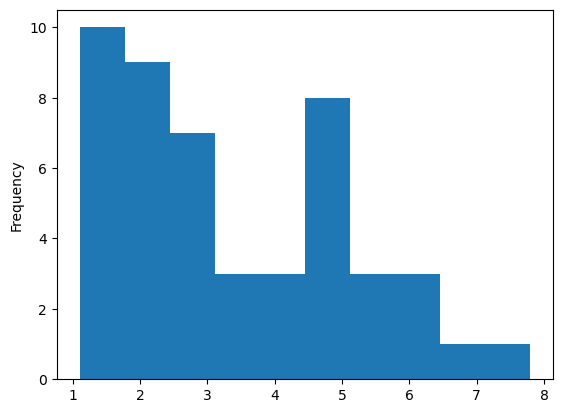

In [56]:
%matplotlib inline
df.complexity.plot.hist()

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [57]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.full_text]

In [58]:
df.clean_text[0]

'Зоологи обнаружили, что бродячие собаки из индийского штата Западная Бенгалия предпочитают миски желтого цвета. В экспериментах эти животные выбирали такие миски примерно в два с лишним раза чаще, чем синие или серые. Более того, собаки отдавали предпочтение желтым мискам, даже если они были пустыми, а в качестве альтернативы выступала серая миска с куском бисквита или курицы. Как отмечается в статье для журнала Animal Cognition, остается неясным, почему индийских бродячих собак так привлекает желтый цвет. Возможно, это связано с тем, что пищевые отбросы, которыми они питаются, в основном желтые.\nСобаки (Canis (lupus) familiaris), подобно большинству млекопитающих, обладают дихроматическим зрением. Они хорошо различают синий и желтый цвета, однако неспособны воспринимать оттенки зеленого и красного. При этом остается неизвестным, какую роль цветовое зрение играет в жизни собак. По некоторыми данным, их могут привлекать предметы определенных цветов. Тем не менее исследование, проведен

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [59]:
df.to_excel('nplus-news.xlsx')